# TP Coding a neural network from scratch

This practice session aims to build your own neural network. You will code the basic functions for the forward pass computation of a neural network, and then the backpropagation algorithm. Then, you will apply your network for a learning on a XOR problem. This practice session will help you to handle the basics and the operations inside a neural network, during the training and the inference (prediction) as well. However, in the next sessions you will use dedicated libraries, such as "Tensorflow/Keras"; the coding is easier and faster, and the training algorithms are optimized for computation speed (exploitation of GPUs if your device is equipped).

In this practice session, some cells must be filled according to the instructions. They are identified by the word **Exercise**. Some of them are followed by verification cells, that help you to verify if your code is correct or not. These cells are identified with the word **Verification**.

**Exercise**: Import numpy and matplotlib.pyplot, denote them with the keyword np and plt.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

**Verification**: Run the next cell, a straight line should appear.

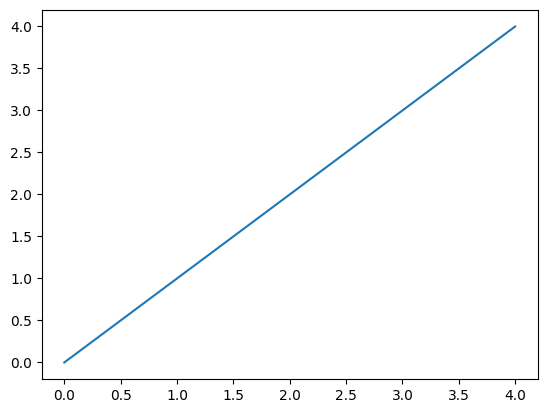

In [3]:
plt.plot(np.arange(5))

## Forward pass computation

In this first part, we create functions that help to compute the forward pass computation of a neural network.

### Activation function

**Exercise**: Let's start by coding the activation functions we will use in the network. We mainly focus on the ReLU (for hidden layers) and sigmoid (for the output, our problem will be a classification problem).

Code the following Python function "activation" that take as input a vector $Z$, a string (either "ReLU" or "sigmoide"). The function must returns a vector on which the desired activation function is applied.

Recall:
- $ReLU(Z) = max(Z,0)$
- $sigmoide(Z) = \frac{1}{1 + e^{-Z}}$

For the sigmoid function, I advice you to favor the use of hyperbolic tangent function to do the computation: it helps avoiding numerical problems in the computation of the exponential function (for very high values for instance). The sigmoid function can be indeed computed from the tanh function.

In [4]:
def activation(Z,fonction):

    if fonction == "ReLU":

        resultat = np.maximum(Z,0)

    if fonction == "sigmoide":

        resultat = 1. / (1. + np.exp(-Z))

    return resultat

**Verification**: Run the following cell.

In [5]:
#DO NOT CHANGE

Z = np.array([2.,10.,-5.,0.,-100.])

print(activation(Z,"ReLU"))
print(activation(Z,"sigmoide"))

[ 2. 10.  0.  0.  0.]
[8.80797078e-01 9.99954602e-01 6.69285092e-03 5.00000000e-01
 3.72007598e-44]


### Computation of a layer

**Exercise**: Let's consider a layer of neurons, represented by a vector $A$ (with $n \times N$ elements that represent the $n$ neurons of the layers, and $N$ is the number of examples, since we can process several examples simultaneously!). The following layer will contain $m$ neurons, the weights between the two layers are represented by a matrix $W$, of size $m \times n$ and the bias by a vector $b$ with size $m$.

For this exercise, we do not apply any activation function. We only compute the linear opeation: $Z = W.A + b$.

You must return a variable, named "cache", that will only contain the 4 elements $(A,W,b,Z)$. This variable can seem useless at this point, but it will be very useful for the backpropagation algorithm: if you remember, we must use the state of every layer to compute the backpropagation.

**Hint**: The function np.dot should help you for the linear operation.

In [6]:
def one_layer_linear(A,W,b):

    Z = np.dot(W,A)+ b
    cache = A,W,b,Z

    return Z, cache

**Verification**: Run the following cell.

In [7]:
#DO NOT CHANGE

np.random.seed(seed = 1)

A = np.random.rand(3,2)
W = np.random.rand(4,3)
b = np.random.rand(4,1)

Z, cache = one_layer_linear(A,W,b)

print(Z)
print(cache == (A,W,b,Z))

[[0.27632903 0.41566595]
 [0.52340787 0.77623274]
 [0.89012538 1.21602897]
 [1.32990003 1.62896921]]
True


**Exercise**: We apply now the total computation, by applying the activation function. Let $g$ the activation function, $A_{prev}$ the vector which represents the output of the previous layer, $A_{new}$ the output of the current layer, thus: $A_{new} = g(W.A_{prev} + b)$. The variable "fonction" is a string that defines the activation function ("ReLU" or "sigmoide" in our case).

The "cache" variable must contain the same element as the function "one_layer_linear".

**Hint**: Use the previous function "activation" and "one_layer_linear".

In [14]:
def one_layer_activation(A_prev,W,b,fonction):

    Z, cache = one_layer_linear(A_prev,W,b)
    A_new = activation(Z,fonction)

    return A_new, cache

**Verification**: Run the following cell.

In [15]:
#DO NOT CHANGE

np.random.seed(seed = 1)

A_prev = np.random.rand(3,2)
W = np.random.rand(4,3)
b = np.random.rand(4,1)

Z, cache_old = one_layer_linear(A_prev,W,b)

A_new, cache_new = one_layer_activation(A_prev,W,b,"sigmoide")
print(A_new)

[[0.56864601 0.60244568]
 [0.62794429 0.68486762]
 [0.70891605 0.77136397]
 [0.7908241  0.83602838]]


### Computation of a complete neural network

**Exercise**: Let's assume that we have a list of parameters "List_W" and "List_b" that contain all of the network parameters (weights and biases) for every layer, and an input matrix $X$ of size $n_X \times N$, where $n_X$ is the input dimension and $N$ is the number of examples.

"List_W" and "List_b" have the same number of elements (the number of layers). We also give "List_activ" that contains the activation function to apply (one element per layer).

Code the following function that apply the whole forward pass computation, on the complete network.

The "caches" variable is a list that will contain all of the caches computed for each layer. The variable Y_pred will contain the network output.

**Hints**:

- This function will be composed by a main loop that goes through every layer of the network
- Use the function "one_layer_activation" for each layer
- In order to know the number of layers, you can take the size of one of the parameter list (List_W or List_b), the function np.size will be useful
- Use l.append(elem) to add elements elem in a list l

In [16]:
def feed_forward(X,list_W,list_b,list_activations):
    print(X.shape)
    A = X
    N_couches = len(list_W)
    caches = []

    for i in range(N_couches):
        A_prev = A
        A, cache = one_layer_activation(A_prev,list_W[i],list_b[i], list_activations[i])
        caches.append(cache)
    Y_pred = A

    return Y_pred,caches

**Verification**: Run the following cell.

In [17]:
#DO NOT CHANGE

np.random.seed(seed = 2)

X = np.random.rand(5,3)
list_W = [np.random.rand(4,5)-1/2,np.random.rand(4,4)-1/2,np.random.rand(2,4)-1/2]
list_b = [np.random.rand(4,1)-1/2,np.random.rand(4,1)-1/2,np.random.rand(2,1)-1/2]
list_activations = ["ReLU","ReLU","sigmoide"]

Y_pred,caches = feed_forward(X,list_W,list_b,list_activations)

print(Y_pred)
print(len(caches) == 3)

(5, 3)
[[0.3863283  0.38738737 0.38502977]
 [0.62732414 0.62279049 0.62796192]]
True


## Loss function

We know implement the loss function we will use later. For this problem, we use the "binary cross-entropy" loss function, since we will address a classification problem with non-exclusive multiclasses ($K$ classes).

Find below the equation of this loss function: a prediction vector $\hat{Y}$ with $N$ examples $\hat{y_{ik}}$ must be compared to a vector of true (expected) values $Y$ with $N$ examples $y_{ik}$ (the index $i$ represent the example $i$ and the index $k$ represents the class $k$):

\begin{equation}
L(Y,\hat{Y}) = - \frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(\hat{y_{ik}}) + (1-y_{ik})\log(1-\hat{y_{ik}})
\end{equation}

**Exercise**: Complete the loss function below, where Y represents the expected values and Y_pred represents the predictions.

**Hints**:
- The functions np.sum, np.mean and np.log will be helpful

In [12]:
def loss_function(Y,Y_pred):

    loss = Y.shape[0]* np.mean(-(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred)))

    return loss


**Verification**: Run the following cell.

In [13]:
#DO NOT CHANGE

np.random.seed(seed = 3)

Y = np.array([[1,0,1],[0,1,1]])
Y_pred = np.random.rand(2,3)


print(loss_function(Y,Y_pred))

1.3334702695881486


## Backward propagation

In this section, we code the backpropagation of the error, that computes the gradients used to update the network parameters.

### Linear backward

Let us consider a layer $l$^. The feed-forward computation is given by: $Z^{[l]} = W^{[l]}.A^{[l-1]} + b^{[l]}$.

Let us assume that we already know the derivative of the loss function according to $Z^{[l]}$ (recursively): $\frac{\partial L}{\partial Z^{[l]}}$.

We know compute $\frac{\partial L}{\partial W^{[l]}}$, $\frac{\partial L}{\partial b^{[l]}}$ and $\frac{\partial L}{\partial A^{[l-1]}}$. The first two derivatives are necessary to obtain the gradient of the loss function according to the parameters of the layer $l$. The last derivative is useful for the recursion in the backpropagation algorithm.

We give below the equations:

\begin{equation}
\frac{\partial L}{\partial W^{[l]}} = \frac{\partial L}{\partial Z^{[l]}} \frac{\partial Z^{[l]}}{\partial W^{[l]}} = \frac{\partial L}{\partial Z^{[l]}} A^{[l-1]T}
\end{equation}

\begin{equation}
\frac{\partial L}{\partial b^{[l]}} = \sum_{i = 1}^{N} (\frac{\partial L}{\partial Z^{[l]}})_i
\end{equation}

\begin{equation}
\frac{\partial L}{\partial A^{[l-1]}} = \frac{\partial L}{\partial Z^{[l]}} \frac{\partial Z^{[l]}}{\partial A^{[l-1]}} = W^{[l]T}\frac{\partial L}{\partial Z^{[l]}}
\end{equation}




**Exercise**: Complete the code with the three equations in the function "linear_backward". As input, we take dZ that corresponds to derivative of the loss function according to Z (supposed to be known), and the cache contains (A_prev,W,b,Z), which explains why the cache (we previously defined in the feed-forward functions) is useful.

**Hint**: For the sum, pay attention to the dimension along whose the operation is applied (dimension corresponding to the examples), you can use the keyword "axis = ...". Take care of using the keyword "keepdims = True" in order to compute consistant operations according to the dimension of the objects.

In [18]:
def linear_backward(dZ,cache):

    A_prev,W,b,Z = cache

    dW = np.dot(dZ,A_prev.T)
    db = np.sum(dZ,axis = 1,keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev,dW,db

**Verification**: Run the following cell.

In [19]:
#DO NOT CHANGE

np.random.seed(seed = 3)

dZ = np.random.rand(3,2)

A_pred = np.random.rand(4,2)
W = np.random.rand(3,4)
b = np.random.rand(3,1)
Z = np.random.rand(3,2)

cache =  (A_pred,W,b,Z)

print(linear_backward(dZ,cache))

(array([[0.84119935, 1.00609737],
       [0.58627548, 0.77106284],
       [0.58203064, 0.64998031],
       [1.20623246, 1.44921602]]), array([[0.21593072, 0.34050656, 0.33996121, 0.55475734],
       [0.14239875, 0.24014989, 0.24205415, 0.33109807],
       [0.29789138, 0.4410523 , 0.43613433, 0.82925743]]), array([[1.25894573],
       [0.80173234],
       [1.78924004]]))


### Add the activation function

**Exercise**: Firstly, we compute the derivative of the loss function that we use in these exercices:

- For $g = ReLU$, $g'(x) = 0$ if $x < 0$ and $g'(x) = 1$ if $x \ge 0$.
- For $g = sigmoid$, $g'(x) = g(x)(1-g(x))$

**Hints**:
- Do not use conditions as "if, then, else" for the ReLU! Use directly the boolean code $Z > 0$.
- For the sigmoid, use the activation function that you have coded in the first cells.

In [21]:
def derivate_activation(Z,activ):

    if activ == "ReLU":

        dg = (Z > 0)*1.

    if activ == "sigmoide":

        dg = activation(Z,"sigmoide")*(1-activation(Z,"sigmoide"))

    return dg

**Verification**: Run the following cell.

In [23]:
#DO NOT CHANGE

np.random.seed(seed = 4)

Z = np.random.rand(4,2) - 1/2.

print(derivate_activation(Z,"ReLU"))
print(derivate_activation(Z,"sigmoide"))

[[1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]]
[[0.23684838 0.24986062]
 [0.23653961 0.24713792]
 [0.24757229 0.24502909]
 [0.23634193 0.23536043]]


**Exercise**: We know add the derivative of the activation function to compute $\frac{\partial L}{\partial Z^{[l]}}$ from $\frac{\partial L}{\partial A^{[l]}}$ (supposed to be known by recursion, since it is compute by the function "linear_backward").

From the following equation:

\begin{equation}
A^{[l]} = g(Z^{[l]})
\end{equation}

we can deduce:

\begin{equation}
\frac{\partial L}{\partial Z^{[l]}} = \frac{\partial L}{\partial A^{[l]}} \frac{\partial A^{[l]}}{\partial Z^{[l]}} = \frac{\partial L}{\partial A^{[l]}} g'(Z^{[l]})
\end{equation}

In the following cell, the activation function is given by the input "activ".

**Hint**:
- The value of $Z^{[l]}$ will be helpful, you can find it in the cache that contains (A_prev,W,b,Z).
- Use the previous function "linear_backward" to find the values of dA_prev, dW and db from dZ that you will have computed, and then apply "derivate_activation" to get the derivative of the activation functions.

In [24]:
def activation_backward(dA,cache,activ):

    A_prev,W,b,Z = cache

    dZ = dA*derivate_activation(Z,activ)

    dA_prev,dW,db = linear_backward(dZ,cache)

    return dA_prev,dW,db

**Verification**: Run the following cell.

In [25]:
#DO NOT CHANGE

np.random.seed(seed = 3)

dA = np.random.rand(3,2)

A_pred = np.random.rand(4,2)
W = np.random.rand(3,4)
b = np.random.rand(3,1)
Z = np.random.rand(3,2)

cache =  (A_pred,W,b,Z)

print(activation_backward(dA,cache,"sigmoide"))

(array([[0.17487705, 0.217628  ],
       [0.12229471, 0.16062103],
       [0.12332169, 0.1508871 ],
       [0.25380512, 0.32009158]]), array([[0.04316761, 0.06778688, 0.06763646, 0.11153914],
       [0.02990346, 0.04956865, 0.04984338, 0.07145092],
       [0.06838174, 0.10498491, 0.10439884, 0.18202664]]), array([[0.25220214],
       [0.16993783],
       [0.40389105]]))


### Finally, we apply the full chain

We initialize the computation from the end of the network and we pass through the different layers until we reach the first layer.

**Exercise**: Apply the backpropagation algorithm in the following cell.

**Hints**:
- You must initialize first the derivative of the loss function for the last layer:
\begin{equation}
\frac{\partial L}{\partial A^{[N_{couches}]}} = \frac{\partial L}{\partial \hat{Y}^{[l]}} = - \frac{1}{N} (\frac{Y}{\hat{Y}} - \frac{1 - Y}{1 - \hat{Y}})
\end{equation}

- We build the loop by going back to the previous layers (note that we use "reversed(range(Ncouches))") (couches = layers)

- Use the "caches" that are stored as a list

- Finally, store the computed gradients of the parameters into two lists list_dW and list_db. Take care of inserting them at the beginning of the list (and not at the end), since the algorithm goes from the end of the network to the beginning! The function l.insert(0,var) will be helpful (l is the list, 0 is the position, beginning the list and var is variable to be inserted).

In [27]:
def backward_propagation(Y_pred,Y,caches,activations):

    list_dW = []
    list_db = []

    N_couches = len(caches)
    N = np.shape(Y_pred)[1]
    Y = Y.reshape(np.shape(Y_pred))

    dA_cur = - (Y/Y_pred - (1-Y)/(1-Y_pred))/N

    for l in reversed(range(N_couches)):

        dA_prev,dW,db = activation_backward(dA_cur,caches[l],activations[l])

        ##TO BE FILLED: insert inside the lists list_dW, list_db
        list_dW.insert(0,dW)
        list_db.insert(0,db)

        dA_cur = dA_prev

    return list_dW, list_db

In [28]:
#DO NOT CHANGE

np.random.seed(seed = 2)

X = np.random.rand(5,3)
list_W = [np.random.rand(4,5)-1/2,np.random.rand(4,4)-1/2,np.random.rand(2,4)-1/2]
list_b = [np.random.rand(4,1)-1/2,np.random.rand(4,1)-1/2,np.random.rand(2,1)-1/2]
list_activations = ["ReLU","ReLU","sigmoide"]

Y_pred,caches = feed_forward(X,list_W,list_b,list_activations)

Y = np.array([[0,1,1],[1,0,1]])

print(backward_propagation(Y_pred,Y,caches,list_activations))

(5, 3)
([array([[-0.00677534,  0.00447579,  0.01418342,  0.01319047,  0.01236515],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01243833,  0.00607596,  0.0040221 ,  0.00898123,  0.00190816]]), array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.04529126,  0.        ,  0.        ,  0.00732433],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.01746327,  0.        ,  0.        ,  0.00810363]]), array([[ 0.        , -0.00673947,  0.        , -0.01793444],
       [ 0.        , -0.00458954,  0.        , -0.01426107]])], [array([[0.01130477],
       [0.        ],
       [0.        ],
       [0.01887614]]), array([[0.        ],
       [0.04775503],
       [0.        ],
       [0.00621147]]), array([[-0.28041819],
       [-0.04064115]])])


## Update of parameters

**Exercise**: Once the gradients are computed, you can use them to update the previous parameters and replace them by the new parameters. Code the following function that takes the list of the old parameters (list_w,list_b), the list of the gradients (list_dw,list_db) and the learning rate alpha, and returns the list of the new parameters according to the following update equations:


\begin{equation}
W^{[l]} := W^{[l]} - \alpha \frac{\partial L}{\partial W^{[l]}}
\end{equation}

\begin{equation}
b^{[l]} := b^{[l]} - \alpha \frac{\partial L}{\partial b^{[l]}}
\end{equation}



In [30]:
def update_parameters(list_w,list_b,list_dw,list_db,alpha):

    N_couches = len(list_w)

    for l in range(N_couches):

        list_w[l] = list_w[l] - alpha*list_dw[l]
        list_b[l] = list_b[l] - alpha*list_db[l]

    return list_w,list_b

**Verification**: Run the following cell.

In [31]:
#DO NOT CHANGE

np.random.seed(seed = 2)

X = np.random.rand(5,3)
list_W = [np.random.rand(4,5)-1/2,np.random.rand(4,4)-1/2,np.random.rand(2,4)-1/2]
list_b = [np.random.rand(4,1)-1/2,np.random.rand(4,1)-1/2,np.random.rand(2,1)-1/2]
list_activations = ["ReLU","ReLU","sigmoide"]

Y_pred,caches = feed_forward(X,list_W,list_b,list_activations)

Y = np.array([[0,1,1],[1,0,1]])

list_dw, list_db = backward_propagation(Y_pred,Y,caches,list_activations)

print(update_parameters(list_W,list_b,list_dw,list_db,0.01))

(5, 3)
([array([[ 0.2854029 ,  0.35393053, -0.005905  ,  0.34642958, -0.42047817],
       [ 0.00524609, -0.4347135 , -0.07187767, -0.40346908, -0.37284003],
       [ 0.09674531, -0.273988  , -0.39305432, -0.27969379, -0.15017371],
       [-0.0323369 , -0.29831753,  0.1403665 , -0.01701998,  0.00521764]]), array([[-1.13107349e-01,  2.93637454e-01,  8.00041789e-02,
        -3.37701401e-01],
       [ 2.00299434e-01,  4.64551080e-01,  8.36117022e-06,
         3.89446821e-01],
       [-1.58386347e-01,  6.71441276e-02, -7.24540367e-02,
        -6.32527370e-02],
       [ 2.76733818e-01,  3.56041735e-02,  4.53742227e-01,
         4.41271238e-02]]), array([[-0.41790508, -0.1335902 ,  0.3508505 , -0.09354561],
       [-0.47279763, -0.25277687, -0.43285563,  0.49399462]])], [array([[0.47046727],
       [0.30025835],
       [0.10181712],
       [0.2647711 ]]), array([[-0.33077455],
       [-0.20745432],
       [ 0.02406688],
       [-0.14343783]]), array([[-0.45151685],
       [ 0.48355986]])])


## Parameters initialization

A last necessary step is missing: the parameters initialization. We will apply a random initialization of the parameters according to a central reduced normal distribution.

**Exercise**: We give a neural network structure: a list that contains the number of neurons in each layer. The first element of the list is the input size, the next elements are the number of neurons in each layer.

The following function must return an initial list of random matrices with weights W and biases b, drawned according to a normal distribution (with the correct dimensions). The list "list_neurons" contains the number of neurons in each layer and first element is the input dimension.

As a reminder, the weight matrices have dimensions (number of neurons in layer l + 1, number of neurons in layer l). The biases vectors have dimensions (number of neurons in layer l). Note that it is not necessary to randomly initialize the biases vectors, we only fill them with zeros.

**Hint**:
- The functions np.random.randn and np.zeros are helpful

In [32]:
def initialisation_parameters(list_neurons):

    N_couches = len(list_neurons)

    list_W = []
    list_b = []

    for l in range(N_couches - 1):

        list_W.append(np.random.randn(list_neurons[l+1],list_neurons[l]))
        list_b.append(np.zeros((list_neurons[l+1],1)))

    return list_W, list_b

**Verification**: Run the following cell.

In [33]:
#DO NOT CHANGE

list_neurons = [2,3,3,1]

np.random.seed(seed = 2)

print(initialisation_parameters(list_neurons))

([array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737]]), array([[ 0.50288142, -1.24528809, -1.05795222],
       [-0.90900761,  0.55145404,  2.29220801],
       [ 0.04153939, -1.11792545,  0.53905832]]), array([[-0.5961597 , -0.0191305 ,  1.17500122]])], [array([[0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.]]), array([[0.]])])


## Let's start the training

We focus on the XOR problem ("exclusive or"). Let's take vectors with two dimensions. If both coordinates of the vector have the same sign, we will assign the vector to class 1, and 0 if the coordinates have opposite signs. As exercise, you can make a drawing of this situation. You can understand that a linear separator will not be able to separate the two classes. We will build a neural network to solve this problem. In the following cell, I build a database.

In [34]:
#NE PAS MODIFIER

N_train = 200

X_train = 2*np.random.rand(2,N_train) - 1

Y_train = (np.sign(X_train[0,:]) == np.sign(X_train[1,:]))*1

Y_train = np.reshape(Y_train,(1,N_train))

N_test = 100

X_test = 2*np.random.rand(2,N_test) - 1

Y_test = (np.sign(X_test[0,:]) == np.sign(X_test[1,:]))*1

Y_test = np.reshape(Y_test,(1,N_test))

**Exercise**: Initialize the network parameters according to the following architecture: [2,5,5,1]. The input dimension is 2 and the output dimension is 1 (we have only two classes, 0 or 1). Give also astivation functions (ReLU for the hidden layers and sigmoid for the last layer). Be careful: there are only two hidden layers.

In [35]:
list_neurons = [2,5,5,1]

list_activations = ["ReLU","ReLU","sigmoide"]

list_W,list_b = initialisation_parameters(list_neurons)

**Exercise**: Execute one thousand of learning epochs with a learning rate of 0.1. For each iteration, we display the value of the loss function on a test set and on the train set. Use the function that you have previously coded.

**Hints**:
- For each epoch, compute one forward propagation
- Compute the loss function you obtain and display it (train set and test set)
- Apply the backpropagation to compute the list of the gradients
- Update the parameters according to these gradients
- And we apply this procedure in a loop!

In [36]:
N_epoques = 1000

alpha = 0.1

for i in range(N_epoques):

    Y_pred_train, caches = feed_forward(X_train,list_W,list_b,list_activations)

    Y_pred_test, _ = feed_forward(X_test,list_W,list_b,list_activations)

    loss_train = loss_function(Y_train,Y_pred_train)

    loss_test = loss_function(Y_test,Y_pred_test)

    print("Epoch" + str(i))
    print("Training loss: " + str(loss_train))
    print("Test loss: " + str(loss_test))

    list_dW, list_db = backward_propagation(Y_pred_train,Y_train,caches,list_activations)

    list_W,list_b = update_parameters(list_W,list_b,list_dW,list_db,alpha)

(2, 200)
(2, 100)
Epoch0
Training loss: 0.8364543808009125
Test loss: 0.8164209430537516
(2, 200)
(2, 100)
Epoch1
Training loss: 0.8131963565849861
Test loss: 0.7985169357472199
(2, 200)
(2, 100)
Epoch2
Training loss: 0.7935132169124293
Test loss: 0.7837587803901106
(2, 200)
(2, 100)
Epoch3
Training loss: 0.7769186307136234
Test loss: 0.7713405572378211
(2, 200)
(2, 100)
Epoch4
Training loss: 0.7629508396809467
Test loss: 0.7610301112011502
(2, 200)
(2, 100)
Epoch5
Training loss: 0.7509758619526312
Test loss: 0.752254412553438
(2, 200)
(2, 100)
Epoch6
Training loss: 0.7404727096462588
Test loss: 0.7446398698942922
(2, 200)
(2, 100)
Epoch7
Training loss: 0.7313078584944627
Test loss: 0.7379451899021351
(2, 200)
(2, 100)
Epoch8
Training loss: 0.7232412369398034
Test loss: 0.7320913377901356
(2, 200)
(2, 100)
Epoch9
Training loss: 0.7160278192100583
Test loss: 0.7269355121557585
(2, 200)
(2, 100)
Epoch10
Training loss: 0.7095474495622729
Test loss: 0.7223521135222668
(2, 200)
(2, 100)
Epo

Both loss functions should decrease if the learning is working. Find below the accuracy on the test set and on the train set: we use a decision threshold of 0.5; if the prediction is below 0.5, we associate the class 1, otherwise, we associate the class 0. We count the number of correct answers and we compute the ratio according to the number of examples.

In [37]:
print("Accuracy on test set: " + str(np.sum((Y_pred_test > 0.5) == Y_test)/N_test))

Accuracy on test set: 1.0


In [38]:
print("Accuracy on train set: " + str(np.sum((Y_pred_train > 0.5) == Y_train)/N_train))

Accuracy on train set: 0.99


You can visualize your predictions on a 2D-square below!

(2, 2500)


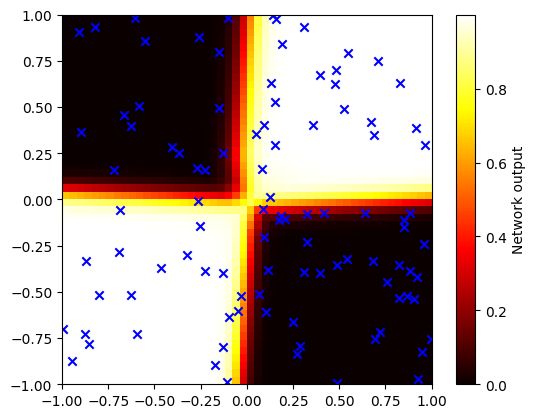

In [39]:
grid = np.meshgrid(np.linspace(-1.,1.,50),np.linspace(-1,1,50))

X_test_new = np.array([grid[0].flatten(),grid[1].flatten()])

Y_pred_new, _ = feed_forward(X_test_new,list_W,list_b,list_activations)

maps = plt.imshow((Y_pred_new.reshape(grid[0].shape[0],grid[0].shape[1])),extent = (-1,1,-1,1),cmap = "hot",origin = "lower")
plt.scatter(X_test[0,:],X_test[1,:],color = "blue",marker = "x")
plt.colorbar(maps, label = "Network output")